In [1]:
import numpy as np
import matplotlib.pyplot as plt 
plt.rcParams.update({'font.size': 14, 'figure.figsize': [12.0, 6.0]})

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],   # для умножения на intercept
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]]) # стаж
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]
X.shape

(2, 10)

$$ L(w)=\frac{1}{n}\sum^{n}_{i=1}\big({y_{pred}}_i-y_{i}\big)^{2}=\frac{1}{n}\sum^{n}_{i=1}\big((w_0\cdot x_{i0}+w_1\cdot x_{i1})-y_{i}\big)^{2}\rightarrow \underset{w}{\text{min}} $$
$$ w_j\leftarrow w_j-\alpha\frac{\partial}{\partial w_j}L(w) $$
$$ \frac{\partial L(w)}{\partial w_j}=\frac{1}{n} 2\sum^{n}_{i=1}x_{ij}\Big(\sum^{m}_{j=0}(w_jx_{ij})-y_i\Big) $$
$$ \vec{w}=\vec{w}-\alpha \frac{2}{n}X^T(X\vec{w}-\vec{y})
 $$

In [ ]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

1. Подберите скорость обучения (alpha) и количество итераций: 

In [89]:
n = X.shape[1]
alpha = 1e-3
w = np.array([1, 0.5])
errors = []

for i in range(int(4801)):
    y_pred = np.dot(w, X)
    err = calc_mse(y, y_pred)
    errors.append(err)
    for j in range(w.shape[0]):
        w[j] -= alpha * (1/n * 2 * np.sum(X[j] * (y_pred - y)))
    if i % 400 == 0:
        print(i, w, err)

0 [1.1102 0.84  ] 3173.15
400 [18.17511588  9.27626113] 500.7989288428639
800 [28.06626432  7.44984037] 243.83236130353217
1200 [34.59041507  6.24510603] 132.03487746741158
1600 [38.89371573  5.45046864] 83.39556413536022
2000 [41.73215361  4.92632937] 62.2342399245102
2400 [43.60437454  4.58060946] 53.027661712772876
2800 [44.8392831   4.35257415] 49.02219014944904
3200 [45.65382326  4.20216307] 47.27954461105105
3600 [46.19109031  4.1029526 ] 46.52137833162843
4000 [46.54546925  4.03751382] 46.19152576288303
4400 [46.77921602  3.99435069] 46.048018038969396
4800 [46.93339434  3.96588049] 45.985582670037175


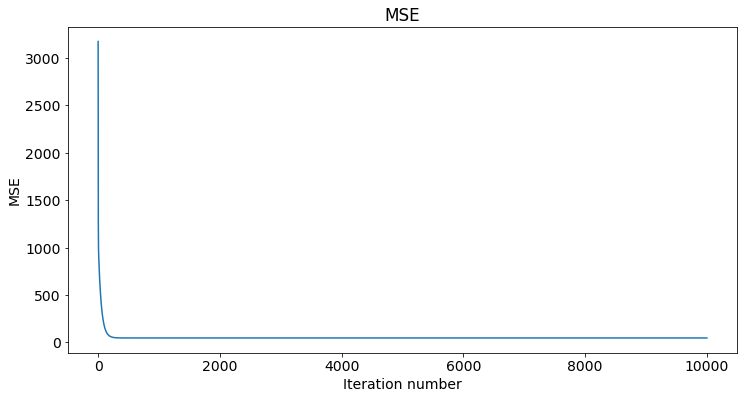

In [52]:
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE');


 2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [116]:
w = np.array([1, 0.5])
alpha = 1e-2

for i in range(501):
    y_pred = np.dot(w, X)
    err = calc_mse(y, y_pred)
    
    w -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis=1)))
    if i % 100 == 0:
        print(i, w, err)

0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001853
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666785
400 [46.56511152  4.03388672] 46.181755648107604
500 [46.99760587  3.95402334] 45.96769776787538


3. Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога

In [123]:
w = np.array([1, 0.5])
min_mse = 0.45
curr_mse = 0
err = np.inf
i = 0

while True:
    y_pred = np.dot(w, X)
    curr_mse = err
    err = calc_mse(y, y_pred)
    if (curr_mse - err) < min_mse:
        break
    w -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis=1)))
    if i % 1 == 0:
        print(i, w, err)
    i += 1

0 [2.102 3.9  ] 3173.15
1 [3.00516  6.249896] 2085.1833639999995
2 [3.76806221 7.86665805] 1543.8856327929857
3 [4.43163475 8.97165466] 1269.450790627765
4 [5.02447601 9.71948649] 1125.3962478602255
5 [ 5.56657319 10.21812369] 1045.1468702184588
6 [ 6.07189929 10.54296976] 996.2256404018397
7 [ 6.55022688 10.74668383] 962.7873115334002
8 [ 7.00839478 10.86604035] 937.0990290056232
9 [ 7.45119279 10.92672004] 915.3849211067269
10 [ 7.88197949 10.94665576] 895.7992568721307
11 [ 8.3031138  10.93836935] 877.437832837458
12 [ 8.71625632 10.91060358] 859.8557658274829
13 [ 9.12257981 10.86946201] 842.832290130507
14 [ 9.52291619 10.81920495] 826.2560334406396
15 [ 9.91785921 10.76280546] 810.0690574965608
16 [10.30783614 10.70233759] 794.2395617920558
17 [10.69315786 10.63924753] 778.7485680045075
18 [11.07405383 10.57454305] 763.5834236832634
19 [11.45069652 10.50892568] 748.7346321280653
20 [11.82321845 10.44288316] 734.1943046789495
21 [12.19172416 10.37675392] 719.9554043828015
22 [12.5